# Lab #3: Asking a statistical question

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Problem 1

In [5]:
mu = 12
std = .4
d = stats.norm.rvs(mu, std, size = 100000)
true = d
false = [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7]
d = np.append(d, false)
np.random.shuffle(d)
print(d[0:50])

[11.69305    12.13379686 11.55678477 11.952837   12.51792883 12.09581898
 12.87046768 12.03046116 11.93322202 12.14256521 12.3729255  11.47489563
 11.43654717 11.66871192 12.66538612 11.68065535 11.82973396 12.4953801
 12.24220507 11.63688338 12.31150206 11.97809366 11.7252348  12.30132057
 12.0612044  12.00386498 11.6836507  11.77380643 12.70878465 12.54111675
 11.26957339 12.0387098  12.18885294 12.36292769 12.35769223 11.26436686
 11.82732813 11.66287512 12.72056839 11.76078462 12.19293961 11.34581784
 11.76617267 12.36484433 11.32001207 12.65981001 11.42216539 11.08058618
 10.98043936 11.89156639]


### A)

#### 1.

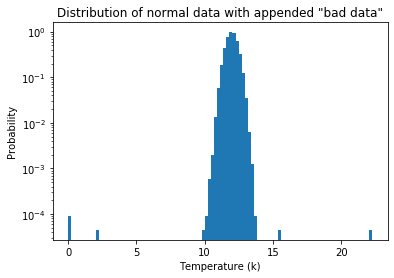

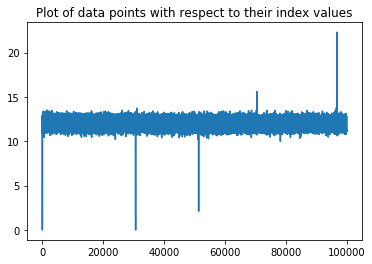

In [7]:
plt.hist(d, 100, density=True)
plt.yscale('log')
plt.xlabel('Temperature (k)')
plt.ylabel('Probability')
plt.title('Distribution of normal data with appended "bad data"')
plt.show()
x = list(range(len(d)))
plt.title('Plot of data points with respect to their index values')
plt.xlabel('Index value')
plt.ylabel('Value')
plt.plot(x, d)

Using my d array, which consists of 100,000 simulated data points assuming a Gaussian fluctuation appended with an array of "bad data", I created a histogram with a log scale y-axis in order to better observe the shape of the distribution. What I found was that you have a very normal distribution on the left side of the graph but towards the right you have random "rises" which I would attribute to the "bad data". The second graph, which is just another way in which I personally visualized this data, is all 100,008 data points graphed with respect to their index in the array. The bad data is visualized when the rather uniform locations of all of the data points spike up very high randomly which may bolster my claim that these "bad data" points are affecting my normal distribution.

#### 2.

"What recorded temperature value on the thermal device is five sigmas or more from the mean so that we can get rid of these points of data?".
"At which x value of temperature in the new distribution (with 'bad data') is the probability of getting the temperature larger than the probability of five sigma to the right of the mean or less than the probability of five sigma to the left of the mean in a normal distribution?" We do this by finding the integral under the distribution at x that  We could search for five sigma of our new dataset by searching all values larger or less than the mean +- stdev * 5 but this doesn't neccessarily give us the probability of five sigma in a normal distribution which is what we're looking for. This method only works for a normal distribution and for any other distribution it would not work. This is my question because I am essentially asking "Which data points have a probability larger or less than 5 sigma?" in order to determine which of the data points are "bad data" and thus worthy of removing. We are using 5 sigma as a base line because the probability of 5 sigma or higher is about 1 in 3.5 million which is reasonable cause to see the data point as an outlier. We also use this baseline because if we go any lower we may be recieving too many false positives and thus losing out on good data. There is discussion to be had whether its better to have more false positives but less true negative or vice versa but we decided it is better to have less false positives and more true negatives.

#### 3.

THROW IN MATH PROBLEM

13.99999999998807
10.00000000001193
100002


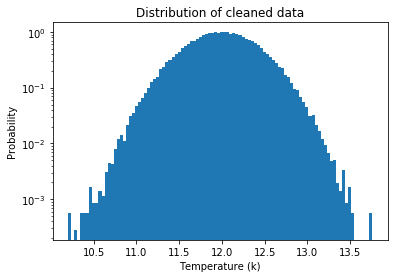

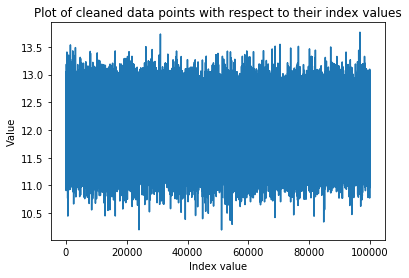

In [9]:
fiveSigma = 1 - stats.norm.cdf(5)
xTop = stats.norm.ppf(1 - fiveSigma, mu, std)
xBot = stats.norm.ppf(fiveSigma, mu, std)
print(xTop)
print(xBot)

# stdev = statistics.stdev(d)
# mean = statistics.mean(d)
# print(stdev)
# print(mean)
for i in reversed(range(len(d))):
    if d[i] > xTop:
        d = np.delete(d, i)
    if d[i] < xBot:
        d = np.delete(d, i)
print(len(d))
plt.hist(d, 100, density=True)
plt.yscale('log')
plt.title('Distribution of cleaned data')
plt.xlabel('Temperature (k)')
plt.ylabel('Probability')
plt.show()
x = list(range(len(d)))
plt.title('Plot of cleaned data points with respect to their index values')
plt.xlabel('Index value')
plt.ylabel('Value')
plt.plot(x, d)

First we calculated the 5 sigma probability of a normal distribution and then we calculated the ppf, or the x value with this given probability, of a normal distribution with the adjusted mean of 12 and standard deviation of .4. I do this for both 1 - fiveSigma and just fiveSigma to get upper and lower limits. Once this was done I iterated through each value in the dataset and tested if the value was > xTop or < xBot to find all of the values less or larger than 5 sigma from the mean. Then, I removed these values and plotted the graph to get a much more normal looking distribution.

#### 4.

In [90]:
trueNeg = 0
truePos = 0
print(len(false))
print(len(true))
for i in range(len(true)):
    if true[i] > xTop or true[i] < xBot:
        trueNeg += 1
    else:
        truePos += 1
falseNeg = 0
falsePos = 0
for i in range(len(false)):
    if false[i] > xTop or false[i] < xBot:
        falseNeg += 1
    else:
        falsePos += 1
print('True negative: ' + str(trueNeg))
print('True positive: ' + str(truePos))
print('False negative: ' + str(falseNeg))
print('False positive: ' + str(falsePos))

8
100000
True negative: 0
True positive: 100000
False negative: 6
False positive: 2


As desired in our previous discussion we were able to achieve no true negatives at the cost of 6 false negatives. True positives are values that should be left in the distribution and are left, false positives are values that should not be left in the distribution but are left, true negatives are values that should be left in the distribution but are not, and false negatives are values that should not be left in the distribution and are not left in it. Thus you will see that we kept all of the original 'good data' with 100000 true positives. Additionally we had 0 true negatives and 6 false negatives which is desirable. Unfortunately this came at the cost of 2 false positives which should have been removed but were not.

### B)

Our statistical threshold is the number of sigmas away from the mean that our cutoff of 'good data' vs 'bad data' is placed at. This 

### C)

There are definitely 

## Problem 2

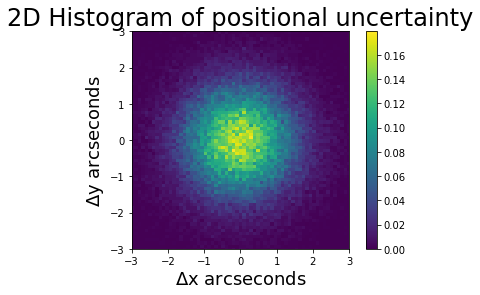

In [9]:
#a = np.concatenate(np.array(stats.norm.rvs( scale = 1, size = 100000)), np.array(stats.norm.rvs( scale = 1, size = 100000)), axis = 1)
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)

### 1.

We ar

### 2.

The mathematical way in which I would approach this is to first understand that the mean is 0 (mu = 0) and rms is 1 (u = 1) and then take the equation of a Gaussian distribution: pdf(r) = (1/sqrt(2pi(mu)^2)) * e^(-(r - u)^2/(2(mu)^2)) = (1/sqrt(2pi)) * e^(-1/2)(r^2) = pdf(x, y) = (1/sqrt(2pi)) * e^(-1/2)(x^2 + y^2). One thing to note at this point is that although this function would work perfectly for a 1D Gaussian the Gaussian we are considering is a 2D Gaussian and so we must change the coordinates slightly. We are looking for 5 sigma away from the average and so since we are looking for a distance away from center we will use polar coordinates. The only change we will be making is that r^2 = x^2 + y^2 according to Pythagorean Theorem. Thus our equation is now pdf(r) = (1/sqrt(2pi)) * e^(-1/2)(r^2). Then we know that the 5 sigma probability is equal to about 1/3.5 million and so you set an integral from 0 to x of this pdf equation and set it equal to sigma 5. integral[0 -> x]((1/sqrt(2pi))(e^(-1/2)(r^2)))dr = 5 sigma on a normal distribution = 1/(3.5*10^6). The value of x will be the 5 sigma x value of the 2D Gaussian.

## Problem 3

### 1.

### 2)

### 3)